# Task 2 - Landsat 8 false color image

## General instructions

First, update the following cell to have a link to your Homework 4 GitHub repository

**UPDATE THIS LINK** https://github.com/hmchilders/eds220-hw-4

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now.

## Overview
The goal of this task is to create a false color image showing the fire scar of the Thomas fire in 2017. 
Read more about false color images here:
[NASA Earth Observatory - Why is that Forest Red and that Cloud Blue?
How to Interpret a False-Color Satellite Image](https://earthobservatory.nasa.gov/features/FalseColor)

## About the data

In this task you will use two datsets:

**First dataset**

A simplified collection of bands (red, green, blue, near-infrared and shortwave infrared) from the Landsat Collection 2 Level-2 atmosperically corrected surface reflectance data, collected by the Landsat 8 satellite. 

Information about Landsat bands from USGS:

- [What are the band designations for the Landsat satellites?](https://www.usgs.gov/faqs/what-are-band-designations-landsat-satellites)

-[Common Landsat Band Combinations](https://www.usgs.gov/media/images/common-landsat-band-combinations)

-[How do I use a scale factor with Landsat Level-2 science products?](https://www.usgs.gov/faqs/how-do-i-use-a-scale-factor-landsat-level-2-science-products)


The data was accessed and pre-processed in the Microsoft Planetary Computer to remove data outside land and coarsen the spatial resolution ([Landsat Collection in MPC](https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2)). Data should be used for visualization purposes only. 


**Second dataset**

A shapefile of fire perimeters in California during 2017. 
The [complete file can be accessed in the CA state geoportal](https://gis.data.ca.gov/datasets/CALFIRE-Forestry::california-fire-perimeters-all-1/about).

## File management
All your data files must be  inside a directory named 'data' **in your gitignore**. 

## Data access
All data is in the Canvas-week7-homework zip file.

## FINAL CODE

You will use the next cell at the end of the task. Leave it blank for now.

In [1]:
### ===== FINAL CODE =====

## Import libraries and functions

In [3]:
# import libraries and functions here
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import xarray as xr
import rioxarray as rioxr
import geopandas as gpd
from shapely import Point
from shapely.geometry import box
from rasterio.features import rasterize 

## Import data

In [16]:
# Import the LandSat8 data
landsat = rioxr.open_rasterio(os.path.join(os.getcwd(),'data','landsat8-2018-01-26-sb-simplified.nc'))
# Import the CalFire data
calfire = gpd.read_file('data/California_Fire_Perimeters_2017/California_Fire_Perimeters_2017.shp')


In [17]:
calfire = calfire[calfire['FIRE_NAME'] == 'THOMAS']

In [18]:
calfire

,index,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,...,GIS_ACRES,COMMENTS,COMPLEX_NA,COMPLEX_IN,IRWINID,FIRE_NUM,DECADES,SHAPE_Leng,SHAPE_Area,geometry
436,20274,41874,2017,CA,USF,VNC,THOMAS,00003583,2017-12-04,2018-01-12,...,281790.875,CONT_DATE based on Inciweb,None,None,None,None,2010,540531.887458,1.681106e+09,"MULTIPOLYGON (((-13316089.016 4088553.040, -13..."


## Exploration 

Use the next cell(s) to perform relevant explorations of these datasets.

CRS.from_epsg(32611)

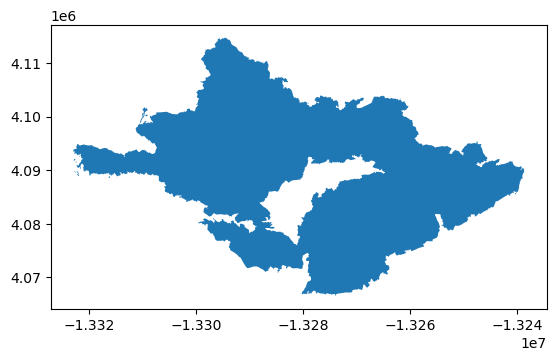

In [19]:
#Plot the CA fire Data
calfire.plot()
#Check the crs of the calfire data
calfire.crs
#View the Landsat Data
landsat.rio.crs

## Updates

If there are any updates needed to the data to plot the true and false color images, perform them in the next cells (you may add as many as you need). 
Comment appropriately.

In [20]:
# Use the squeeze method to remove dimensions with length 1
landsat = landsat.squeeze()
#Remove coordinates associated with that dimension
landsat = landsat.drop('band')
#Check the output
landsat

<xarray.Dataset>
Dimensions:      (y: 731, x: 870)
Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
    spatial_ref  int64 0
Data variables:
    red          (y, x) float64 ...
    green        (y, x) float64 ...
    blue         (y, x) float64 ...
    nir08        (y, x) float64 ...
    swir22       (y, x) float64 ...

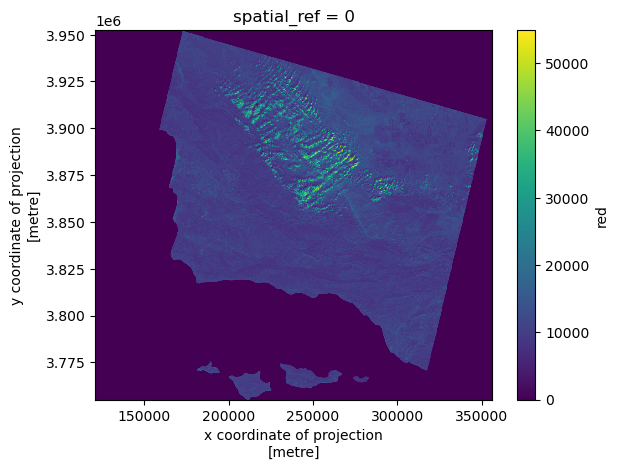

In [21]:
landsat[ 'red' ].plot()

## True color image

Without creating any new variables:

Select the red, green and blue variables (in that order) of the `xarray.Dataset`, convert it to a `numpy.array` using the `to_array()` method, and then use `.plot.imshow()` to create an RGB image with the data. (There will be a warning)

In [22]:
# your code here
landsat_array_rgb = landsat[ ['red','green','blue'] ].to_array()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


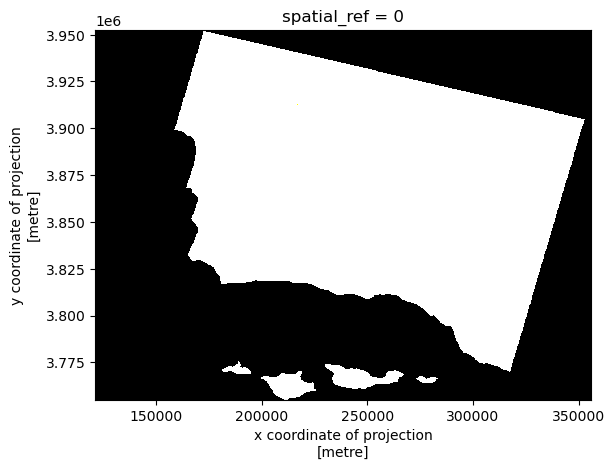

In [23]:
landsat_array_rgb.plot.imshow()

Adjust the scale used for plotting the bands to get a true color image. 
HINT: [Check the `robust` parameter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)
The issue here is the clouds: their RGB values are outliers and cause the other values to be squished when plotting. 

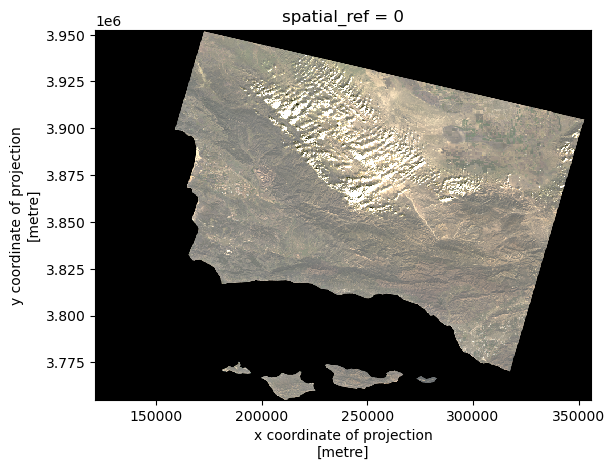

In [24]:
# your code here
landsat_array_rgb.plot.imshow(robust = True)

## False color image
Without creating any new variables:

Create a false color image by plotting the short-wave infrared (swir22), near-infrared, and red variables (in that order).

In [25]:
# your code here
landsat_false = landsat[ ['swir22','nir08','red'] ].to_array()

In [26]:
landsat_false

<xarray.DataArray (variable: 3, y: 731, x: 870)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
    spatial_ref  int64 0
  * variable     (variable) <U6 'swir22' 'nir08' 'red'

In [27]:
landsat_array = landsat.to_array()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


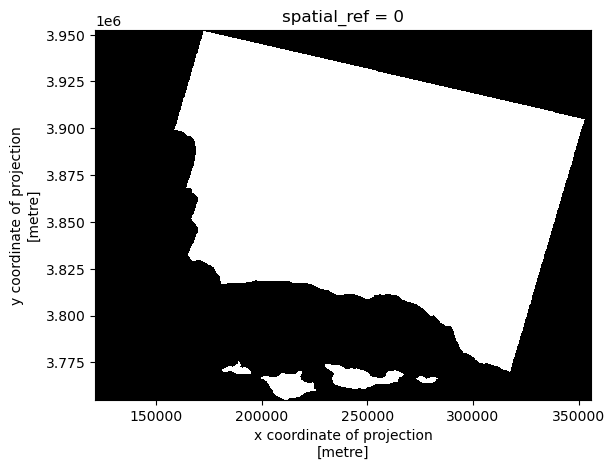

In [28]:
landsat_false.plot.imshow()

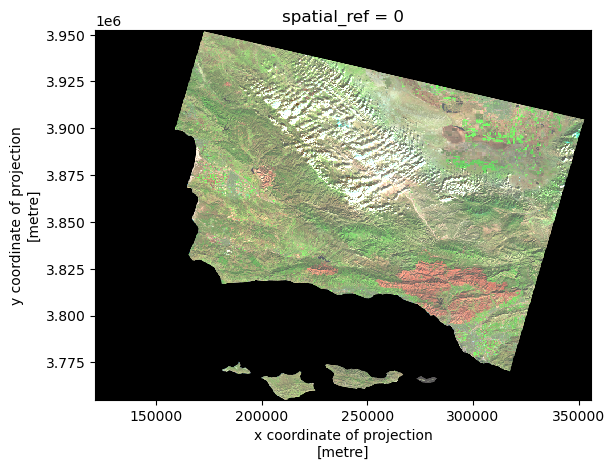

In [29]:
# your code here
landsat_false.plot.imshow(robust = True)

## Updates

If there are any updates needed to the data to create the map, perform them in the next cells (you may add as many as you need). 
Comment appropriately.

In [30]:
# your code here
calfire = calfire.to_crs(landsat.rio.crs)

calfire.crs == landsat.rio.crs



True

## Map

Create a map showing the shortwave infrared/nir/ ed false color image together with the Thomas fire perimeter. 
Customize it appropriately.

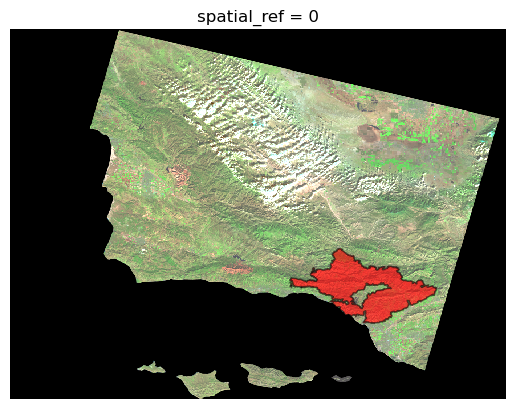

In [33]:
# your code here
fig, ax = plt.subplots()
# --------------------------
ax.axis('off')


calfire.plot(ax=ax, color='red', alpha = 0.6, edgecolor='black')

landsat_false.plot.imshow(ax = ax, robust = True)



# --------------------------

plt.show()

## Final code

Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The only ouput of this cell should be the plot you produced in the previous exercise. 

Add divisions for relevant sections and comment appropriately.